# ReCell 



## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

### Let us start by importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb_black
import nb_black
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# loading data
data = pd.read_csv("used_device_data.csv")  

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 3454 rows and 15 columns.


In [4]:
# viewing a sample of the data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


In [5]:
# create a copy of the data to avoid any changes to original data
df = data.copy()

In [6]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [7]:
# Converting "objects" to "category" reduces the data space required to store the dataframe


df.os = df.os.astype("category") # Convert group from object to category  
df.brand_name = df.brand_name.astype("category")  

df['4g'] = df['4g'].astype('category')  # Convert converted from object to category
df['5g'] = df['5g'].astype('category')  # Convert language_preferred from object to category

# Use info() to print a concise summary of the DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3275 non-null   float64 
 6   selfie_camera_mp  3452 non-null   float64 
 7   int_memory        3450 non-null   float64 
 8   ram               3450 non-null   float64 
 9   battery           3448 non-null   float64 
 10  weight            3447 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 312.2 KB


There are many numeric (float and int type) and some string (object type) columns in the data. Dependent variable is the used_price, which is of float type.

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

There are no duplicate values in the data

In [9]:
# checking for missing values in the data
df.isnull().sum() 

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64


There are missing values in 6 columns of the data set, with the most being in the main_camera_mp column

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [10]:
df.describe().T  #  Code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


We can see that the used_price vary between 4.65 and 749.52 and an average of 92.30 Euros. Android is the most occurring type of OS. 4g is more available on the devices than 5g. Release year of the device models range from 2013 to 2020 Number of days the used/refurbished device had been used range from 91 to 1094 days

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`used_price`**

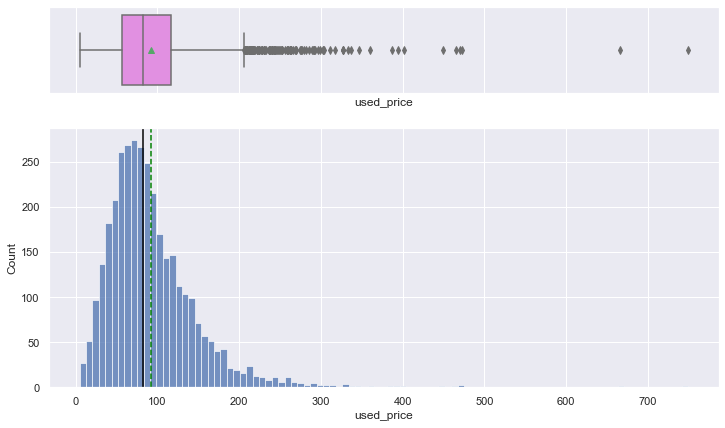

In [13]:
histogram_boxplot(df, "used_price")

The distribution is rightly skewed with a median used price of about 82 and mean of 92 Euros.

In [14]:
df["used_price_log"] = np.log(df["used_price"])

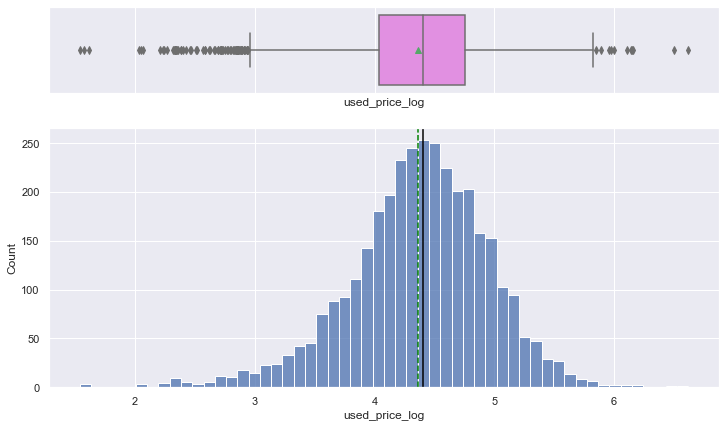

In [15]:
histogram_boxplot(
    df, "used_price_log"
)  # Creating histogram_boxplot for 'used_price_log'

Although the distribution is still skewed, now to both the left and right areas, the shape of the distribution is now much closer to a normal distribution than it was before the log transform

**`new_price`**

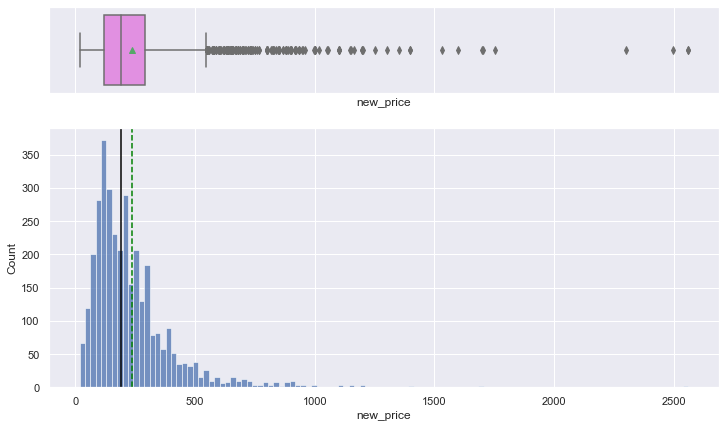

In [16]:
histogram_boxplot(
    df, "new_price"
)  # Creating histogram_boxplot for 'new_price'

The distribution is heavily right-skewed revealing lots of outliers, with a median used price of about 190 and mean of 237 Euros.

In [17]:
# let's apply the log transform to see if we can make the distribution of new_price closer to normal
df["new_price_log"] = np.log(df["new_price"])

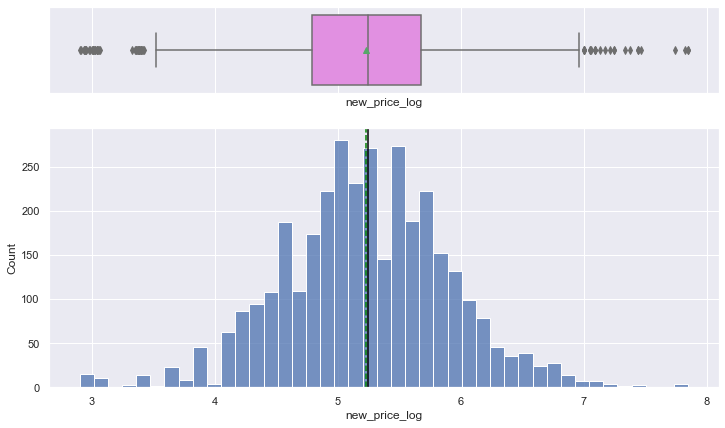

In [18]:
histogram_boxplot(
    df, "new_price_log"
)  # Creating histogram_boxplot for 'new_price_log'

Although the distribution is still skewed, now to both the left and right areas, the shape of the distribution is now much closer to a normal distribution than it was before the log transform

**`screen_size`**

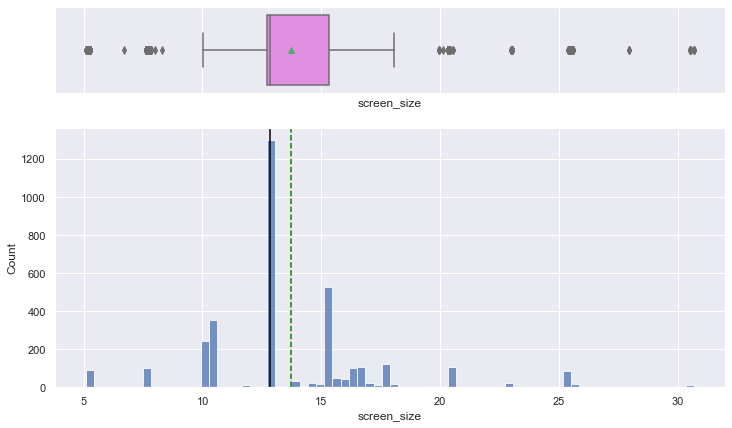

In [19]:
histogram_boxplot(
    df, "screen_size"
)  # Creating histogram_boxplot for 'screen_size'

The distribution is skewed with severeal outliers both to the left and the right. The mean is about 14 cm while median is approx 13 cm

**`main_camera_mp`**

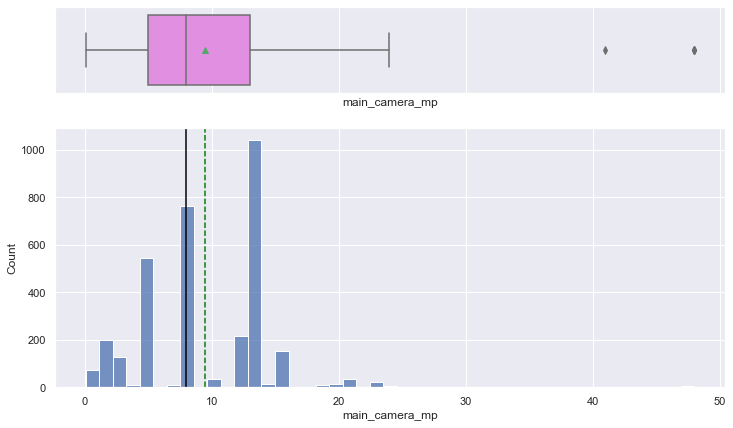

In [20]:
histogram_boxplot(
    df, "main_camera_mp"
)  # Creating histogram_boxplot for 'main_camera_mp'

The main camera resolution distribution is right skewed, ranging from about 0.1 to 24 mexapixels with a mean of 9.5mp and median 8m. However, there are few outliers in the data set at about 41mp and 48mp

**`selfie_camera_mp`**

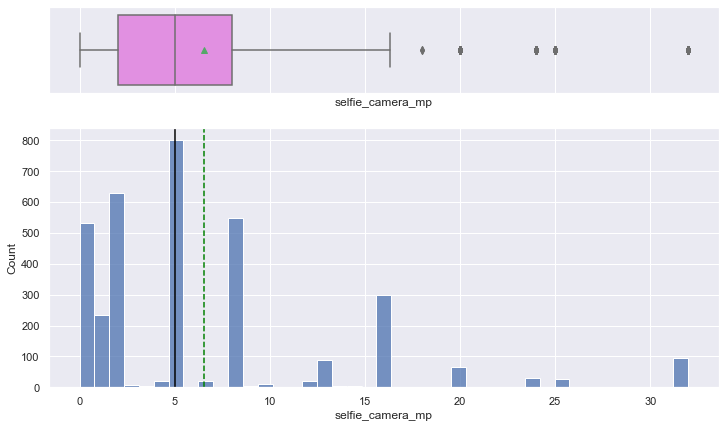

In [21]:
histogram_boxplot(
    df, "selfie_camera_mp"
)  # Creating histogram_boxplot for 'selfie_camera_mp'

Similar to the main camera distribution, the selfie camera distribution is right skewed with range from 0 to 16mp with a median of 5mp, mean of 6.5mp and some noted outliers between 18 and 32mp

**`int_memory`**

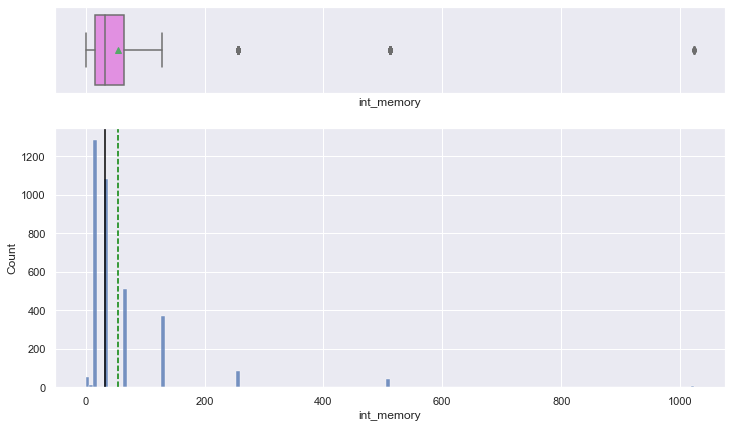

In [22]:
histogram_boxplot(
    df, "int_memory"
)  # Creating histogram_boxplot for 'int_memory'

The internal memory distribution is right skewed with am average of 54.5GB and median 32GB. There also exists outliers upto over 1000GB

**`ram`**

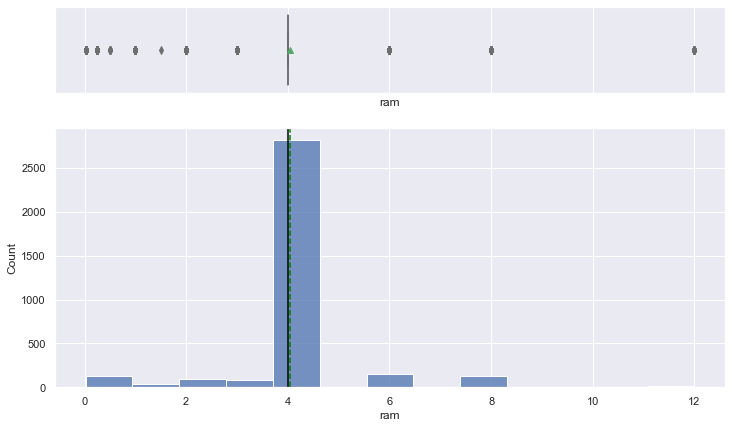

In [23]:
histogram_boxplot(df, "ram")  # Creating histogram_boxplot for 'ram'

Distribution of the ram data shows that the mean, median and interquartile range are all at about 4GB each, and the rest of the data points in the distribution are several outliers both to the left and right of the distribution. Range of data points are from 0GB to 12GB.

**`weight`**

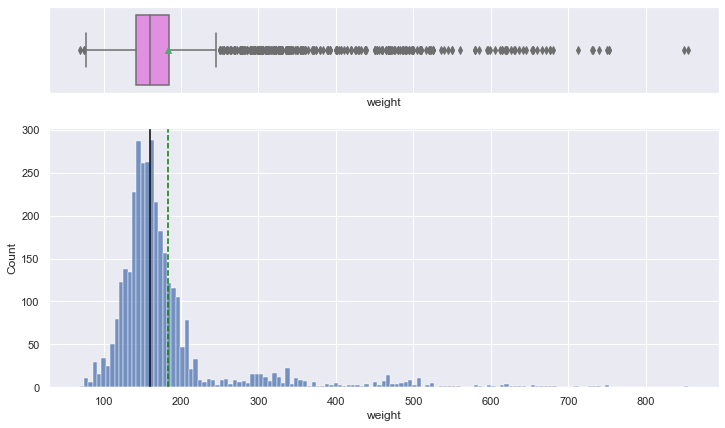

In [24]:
histogram_boxplot(
    df, "weight"
)  # Creating histogram_boxplot for 'weight'

The weight distribution is heavily right skewed with most devices weighing less than 300g, there are a few outliers to the left whiskers but several outliers can be seen beyond the right whisker of the box plot up to over 850grams. The mean and median are far apart at about 183 and 160 grams respectively.

**`battery`**

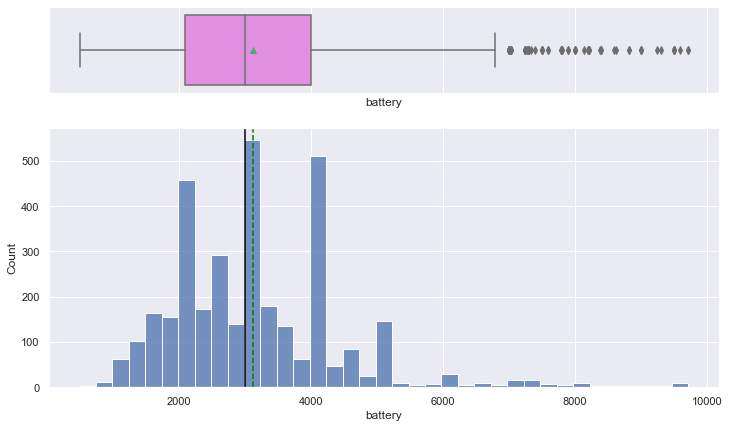

In [25]:
histogram_boxplot(
    df, "battery"
)  # Creating histogram_boxplot for 'battery'

The battery distribution is right skewed with a close mean and median at approximately 3100 and 3000mAh respectively. There are outliers up to over 9500mAh

**`days_used`**

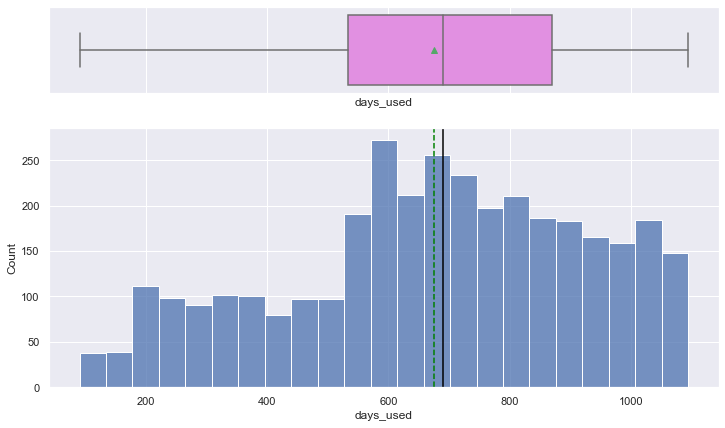

In [26]:
histogram_boxplot(
    df, "days_used"
)  # Creating histogram_boxplot for 'days_used'

Days used is slightly left skewed with an average of 675 and median 690 days respectively

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`brand_name`**

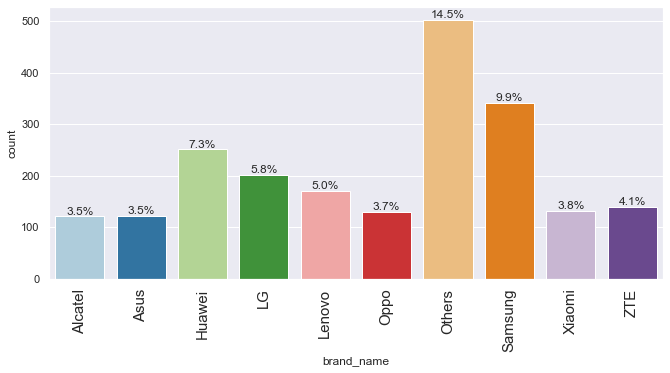

In [28]:
labeled_barplot(df, "brand_name", perc=True, n=10)

14.5% (highest category) of the used/refurbished devices in the data set are not branded, they are classified as "others". This is followed by Samsung at 9.9%, Huawei at 7.3% and so on.

**`os`**

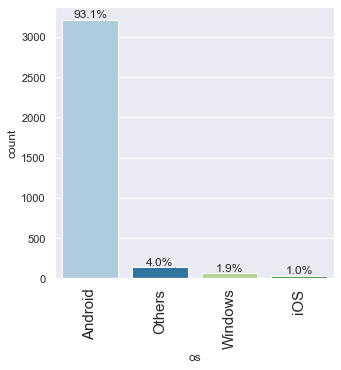

In [29]:
labeled_barplot(
    df, "os", perc=True, n=None
)  # Creating labeled_barplot for 'os'

93.1% of the devices are of Android OS. This is followed by others at 4%, windows at 1.9% and iOS at 1%

**`4g`**

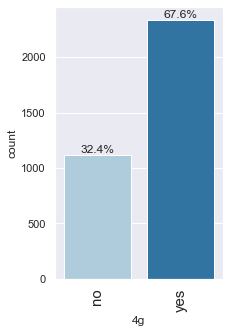

In [30]:
labeled_barplot(
    df, "4g", perc=True, n=None
)  # Creating labeled_barplot for '4g'

4G is available in 67.6% of the devices in the data set

**`5g`**

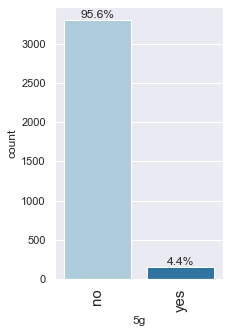

In [31]:
labeled_barplot(
    df, "5g", perc=True, n=None
)  # Creating labeled_barplot for '5g'

5G is only available in 4.4% of the devices in the data set and unavailable in 95.6% of the devices

**`release_year`**

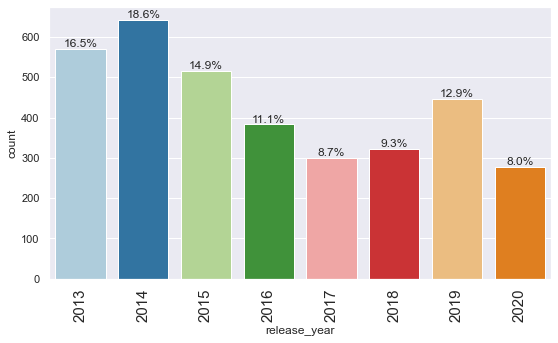

In [32]:
labeled_barplot(
    df, "release_year", perc=True, n=None
)  # Creating labeled_barplot for 'release_year'

The device models in the data set were released between 2013 and 2020. 50% of them were released between 2013 and 2015, with the most (18.6%) released in 2014 and the least (8.0%) released in 2020

### Bivariate Analysis

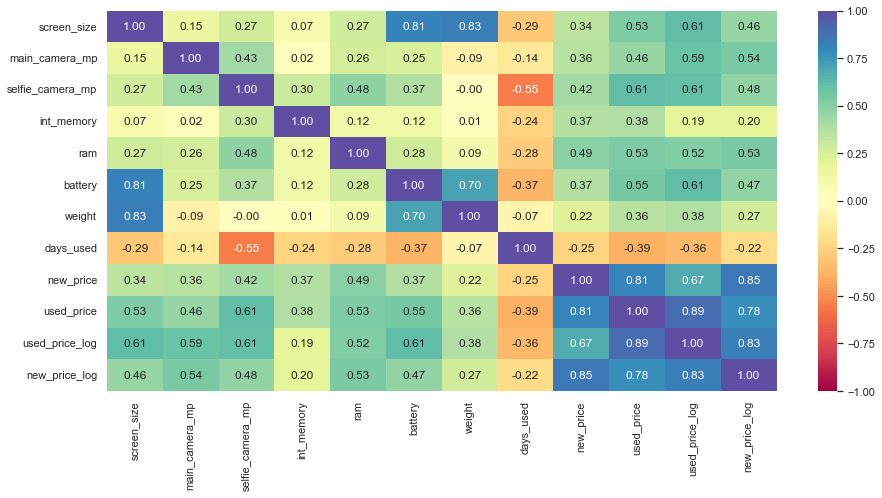

In [33]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

new price and used price variables are highly correlated Similarly, the log transformed variables i.e new price and new price log; used price and used price log; new price log and used price log are all highly correlated Also, screensize is highly correlated with weight, and Battery is highly correlated with screensize

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

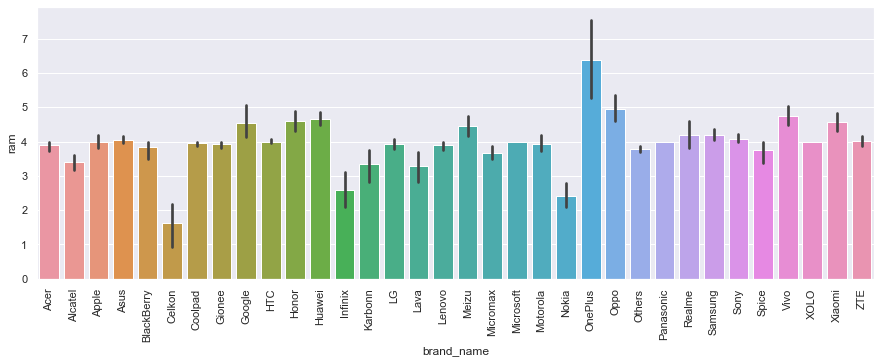

In [34]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

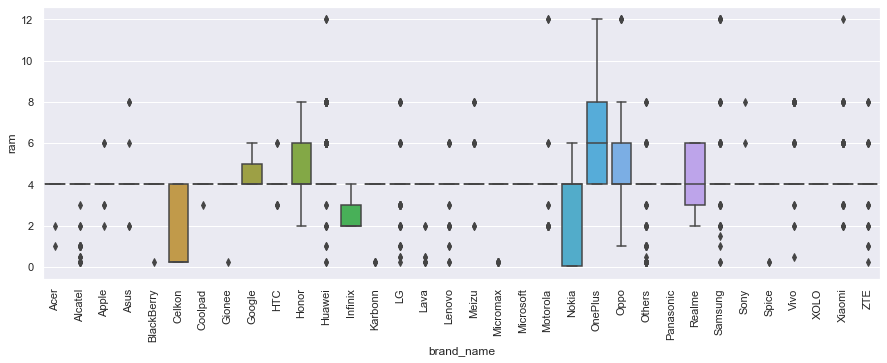

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

OnePlus provides the highest amount of RAM on an average of over 6GB for used/refurbished devices followed by Oppo. Honor, Google, Xiaomi, Huawei, Meizu and Vivo all provide similar average RAM capacity at over 4GB. Celkon and Nokia offer the least average RAM

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [36]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

There are 341 rows and 17 columns in the dataframe of devices with battery greater than 4500mAh

In [37]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax      118.000000
Spice         158.000000
Panasonic     182.000000
Infinix       193.000000
Oppo          195.000000
ZTE           195.400000
Vivo          195.630769
Realme        196.833333
Motorola      200.757143
Gionee        209.430000
Xiaomi        231.500000
Honor         248.714286
Asus          313.772727
Nokia         318.000000
Acer          360.000000
LG            366.058333
Alcatel       380.000000
Others        390.546341
Huawei        394.486486
Samsung       398.352000
HTC           425.000000
Sony          439.500000
Apple         439.558824
Lenovo        442.721429
Google        517.000000
BlackBerry           NaN
Celkon               NaN
Coolpad              NaN
Karbonn              NaN
Lava                 NaN
Meizu                NaN
Microsoft            NaN
OnePlus              NaN
XOLO                 NaN
Name: weight, dtype: float64

Google devices weigh heaviest at an average of over 500 grams followed by Lenovo, Apple Sony, HTC all weighing over 400grams and the lightest devices are Micromax at just over 100 grams. A few other brand of devices also weigh averagely less than 200 grams such as Spice, Panasonic, Infinix, etc.

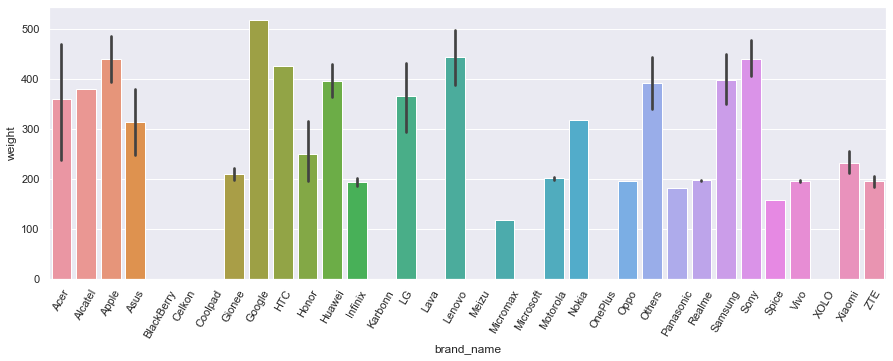

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(
    data=df_large_battery, x="brand_name", y="weight"
)  # Create barplot for 'brand_name' and 'weight'
plt.xticks(rotation=60)
plt.show()

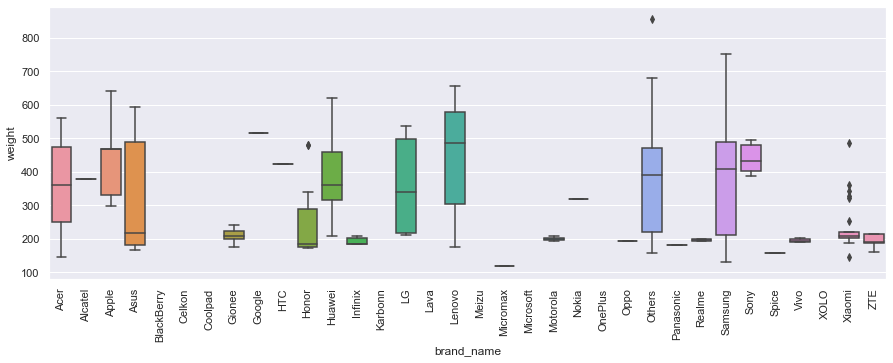

In [39]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

Google devices weigh heaviest at an average of over 500 grams followed by Lenovo, Apple Sony, HTC all weighing over 400grams and the lightest devices are Micromax at just over 100 grams. A few other brand of devices also weigh averagely less than 200 grams such as Spice, Panasonic, Infinix, etc.

**People who buy devices primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [40]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 17)


There are 1099 rows of data for devices that have large screens (sreensize greater than 15.24cm)

In [41]:
df_large_screen.groupby("brand_name")["screen_size"].mean().sort_values(ascending=True)

brand_name
Meizu         15.337059
Motorola      15.366190
Gionee        15.623333
Realme        15.638500
Oppo          15.671286
Panasonic     15.710000
Infinix       15.756000
Coolpad       16.010000
HTC           16.041429
ZTE           16.160588
Vivo          16.164750
OnePlus       16.578750
Xiaomi        16.590580
Nokia         16.723333
Honor         16.849444
LG            17.233729
Karbonn       17.780000
Google        17.852500
Huawei        17.854631
Alcatel       18.566538
XOLO          18.626667
Micromax      18.868571
Others        19.362727
Lenovo        19.364783
Asus          19.380488
Samsung       19.439580
Acer          20.495263
Sony          20.801667
Spice         21.590000
Apple         22.904167
Microsoft     25.550000
BlackBerry          NaN
Celkon              NaN
Lava                NaN
Name: screen_size, dtype: float64

In [42]:
df_large_screen.brand_name.value_counts()

Huawei        149
Samsung       119
Others         99
Vivo           80
Honor          72
Oppo           70
Lenovo         69
Xiaomi         69
LG             59
Motorola       42
Asus           41
Realme         40
Alcatel        26
Apple          24
Acer           19
Meizu          17
ZTE            17
OnePlus        16
Nokia          15
Sony           12
Infinix        10
Micromax        7
HTC             7
Google          4
XOLO            3
Gionee          3
Coolpad         3
Spice           2
Panasonic       2
Karbonn         2
Microsoft       1
Celkon          0
BlackBerry      0
Lava            0
Name: brand_name, dtype: int64

Huawei and Samsung have more than 100 devices with large screens (>15.24cm) with Huawei been the highest 149 devices. Microsoft has the least number of devices with large screen. Microsoft, karbonn, Spice, Panasonic, XOLO, Gionee, Coolpad and Google devices all have less than 5 devices with large screens in the dataset.

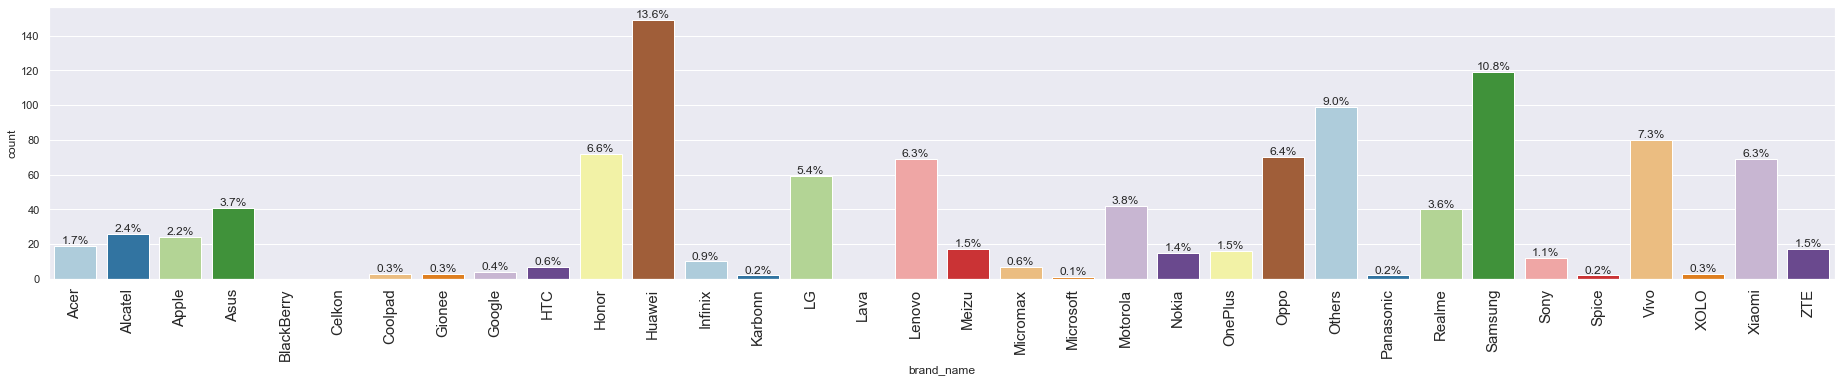

In [43]:
labeled_barplot(
    df_large_screen, "brand_name", perc=True, n=None
)  # Create labeled_barplot for 'brand_name' in large screen dataframe

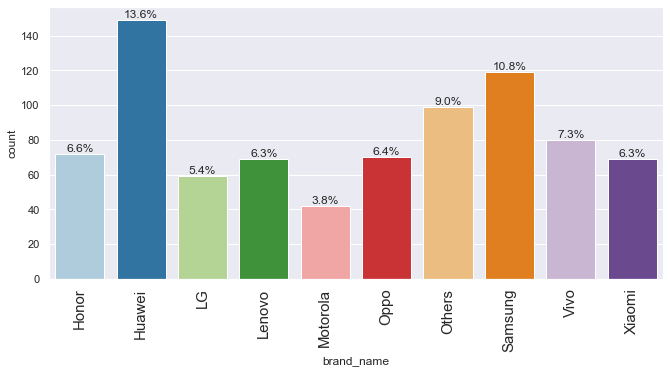

In [44]:
labeled_barplot(
    df_large_screen, "brand_name", perc=True, n=10
)  # Create labeled_barplot for 'brand_name' in large screen dataframe

Huawei has the highest percentage of devices with large screens (>15.24cm) followed by Samsung, others and so on.

## Data Preprocessing

### Feature Engineering

- Let's create a new column `device_category` from the `new_price` column to tag devices as budget, mid-ranger, or premium.

In [45]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

Segmenting the devices by price of new devices, Budget 1844 Mid-ranger 1025 Premium 585

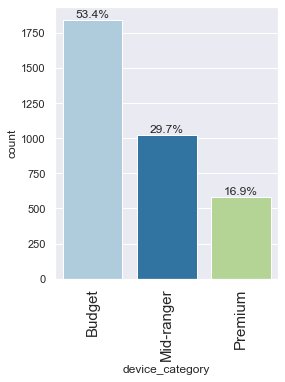

In [46]:
labeled_barplot(
    df, "device_category", perc=True,
)  # To create labeled_barplot for 'device_category'

53.4% of the devices in the data are in the budget category based on price of a new device of the same model being lower than 200 Euros. 29.7% are Mid-rangers i.e between 200 and 350 Euros and 16.9% are termed Premium (Greater than 350 Euros).

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [47]:
df_selfie_camera = df[
    df.selfie_camera_mp > 8
]  # To create a dataframe having selfie_camera_mp > 8
df_selfie_camera.shape

(655, 18)

There are 655 rows of data for devices with selfie camera greater than 8mp

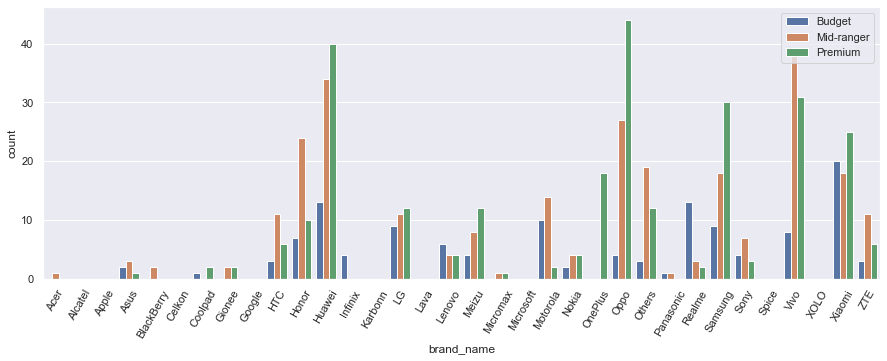

In [48]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_selfie_camera, x="brand_name", hue="device_category"
)  # To create countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

Analysing the dataframe of good (>8mp) selfie camera devices, Oppo has the highest number of Premium devices in the category, followed by Huawei and then Vivo and Samsung. Vivo has the highest number of Mid-ranger devices followed by Huawei and then Oppo, while Xiamoi has the highest number of budget phones followed by Realme and Huawei

**Let's do a similar analysis for rear cameras.**

In [49]:
df_main_camera = df[
    df.main_camera_mp > 16
]  # To create a dataframe having main_camera_mp > 16
df_main_camera.shape

(94, 18)

There are 94 rows of data for devices with main camera greater than 16mp

<AxesSubplot:xlabel='brand_name', ylabel='count'>

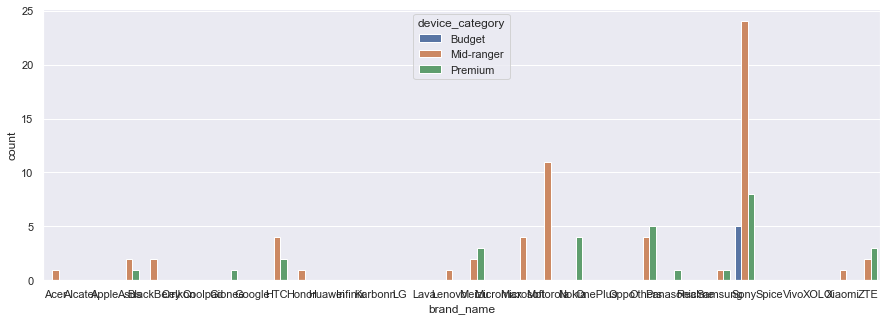

In [50]:
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_main_camera, x="brand_name", hue="device_category"
)  # To create countplot for 'brand_name' with hue = 'device_category' on df_main_camera

Analysing the dataframe of good (>16mp) main camera devices, Sony has the highest number of Premium devices in the category, followed by Others, Nokia and ZTE. Sony has the highest number of Mid-ranger devices in the category, followed by Motorola and then HTC and Microsoft Only Sony has budget devices in this category of good main camera devices.

**Let's see how the price of used devices varies across the years.**

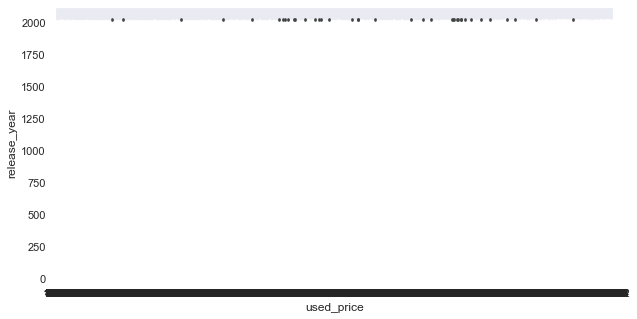

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

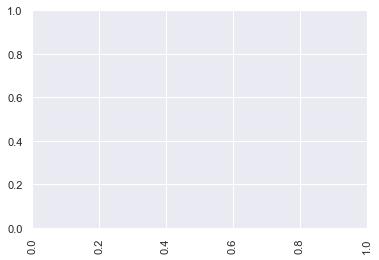

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, x="used_price", y="release_year"
)  # To create barplot for release year and used price
plt.show()
plt.xticks(rotation=90)

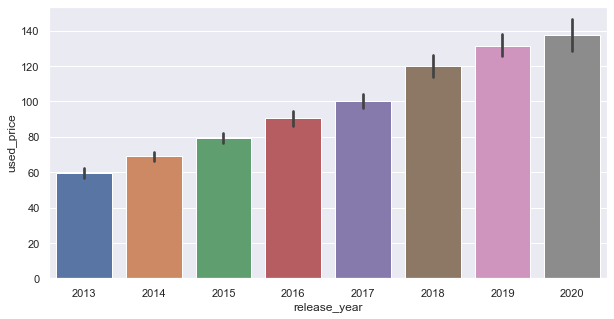

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

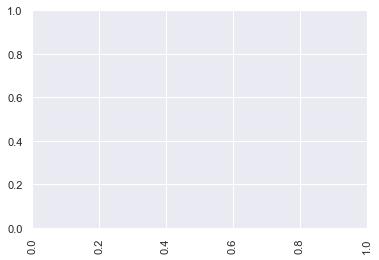

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, x="release_year", y="used_price"
)  # To create barplot for release year and used price
plt.show()
plt.xticks(rotation=90)

Prices of used/refurbished devices increase as newer models of the devices are released in latter years.

**Let's check the distribution of 4G and 5G devices wrt price segments.**

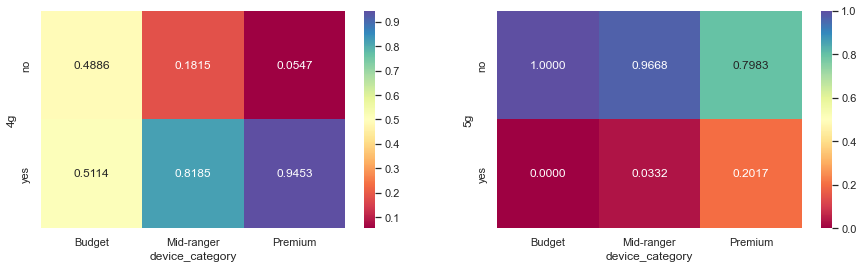

In [53]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)  # Create crosstab for 5g

plt.show()

4g's Premium price segment is highly correlated with devices that have 4g. Mid-ranger devices are also highly correlated with devices that have 4g 5g's Budget price category has a perfect correlation with devices that do not have 5g. Mid-ranger devices also have a very high correlation with devices that do not have 5g

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [54]:
# let's create a copy of the data
df1 = df.copy()

In [55]:
# checking for missing values
df1.isnull().sum()  


brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

There are 179 missing values in main_camera_mp column. Also few missing values are noted in selfie_camera_mp, int_memory, ram, battery and weight columns

In [56]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )  # To impute missing values in cols_impute with median by grouping the data on release year and brand name

In [57]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [58]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )  # To impute the missing values in cols_impute with median by grouping the data on brand name

In [59]:
df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
used_price_log       0
new_price_log        0
device_category      0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [60]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    df1["main_camera_mp"].median()
)  # To impute the data with median

# checking for missing values
df1.isnull().sum()  

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
device_category     0
dtype: int64

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

In [62]:
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
used_price_log      0
new_price_log       0
device_category     0
dtype: int64

There are no more missing values in any of the columns

### Outlier Check

- Let's check for outliers in the data.

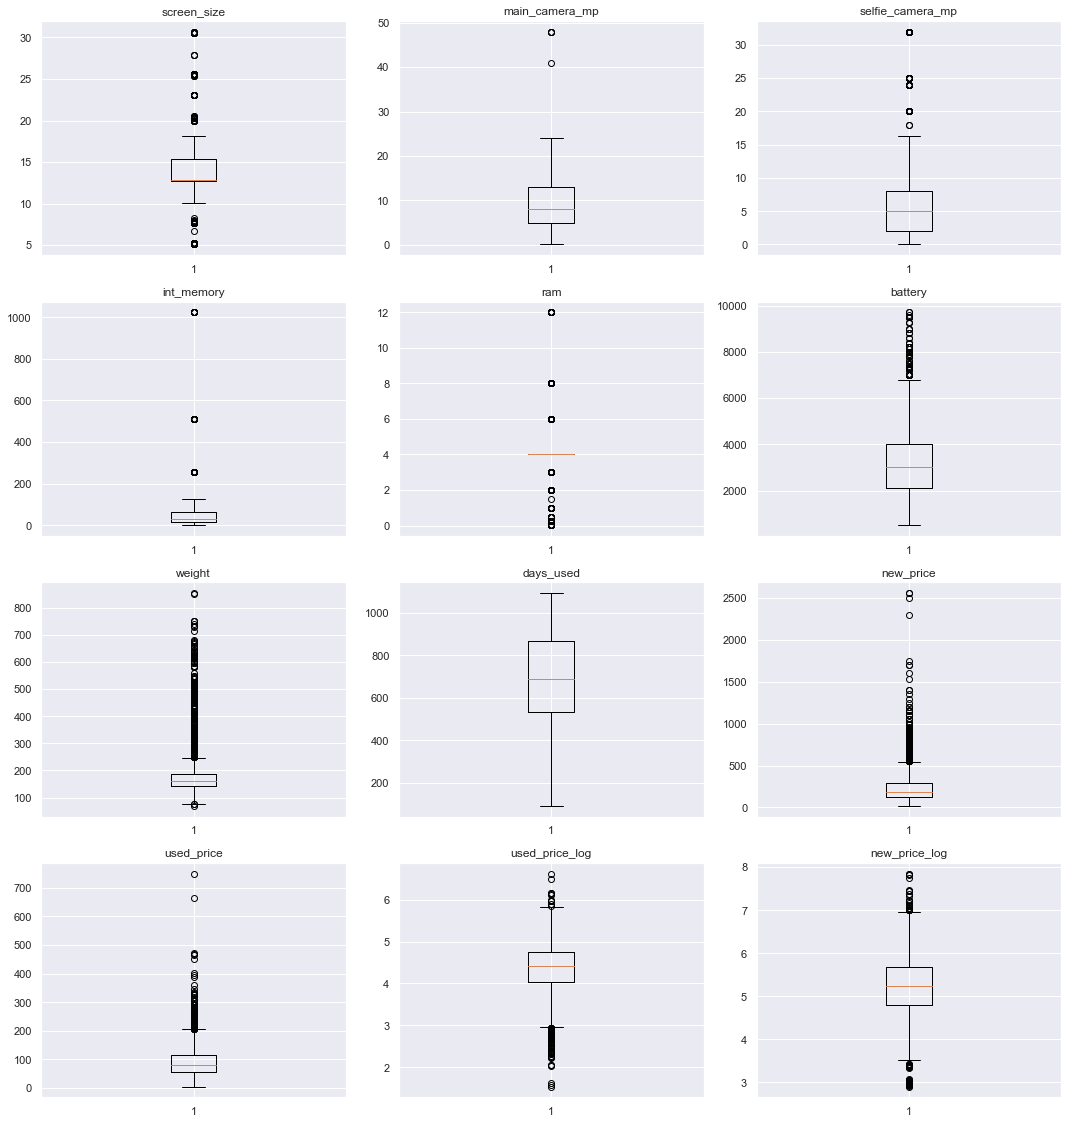

In [63]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable) # Creating boxplots for all the columns
plt.show()


Most of the columns do have outliers in them. We will treat these outliers by flooring and capping, i.e., we will replace the lower outliers by Q1 - 1.5IQR. upper outliers by Q3 + 1.5IQR.

## Outlier Treatment

In [64]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [65]:
treat_numeric_columns = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "battery",
    "weight",
    "new_price",
]

df2 = treat_outliers_all(df1, treat_numeric_columns)

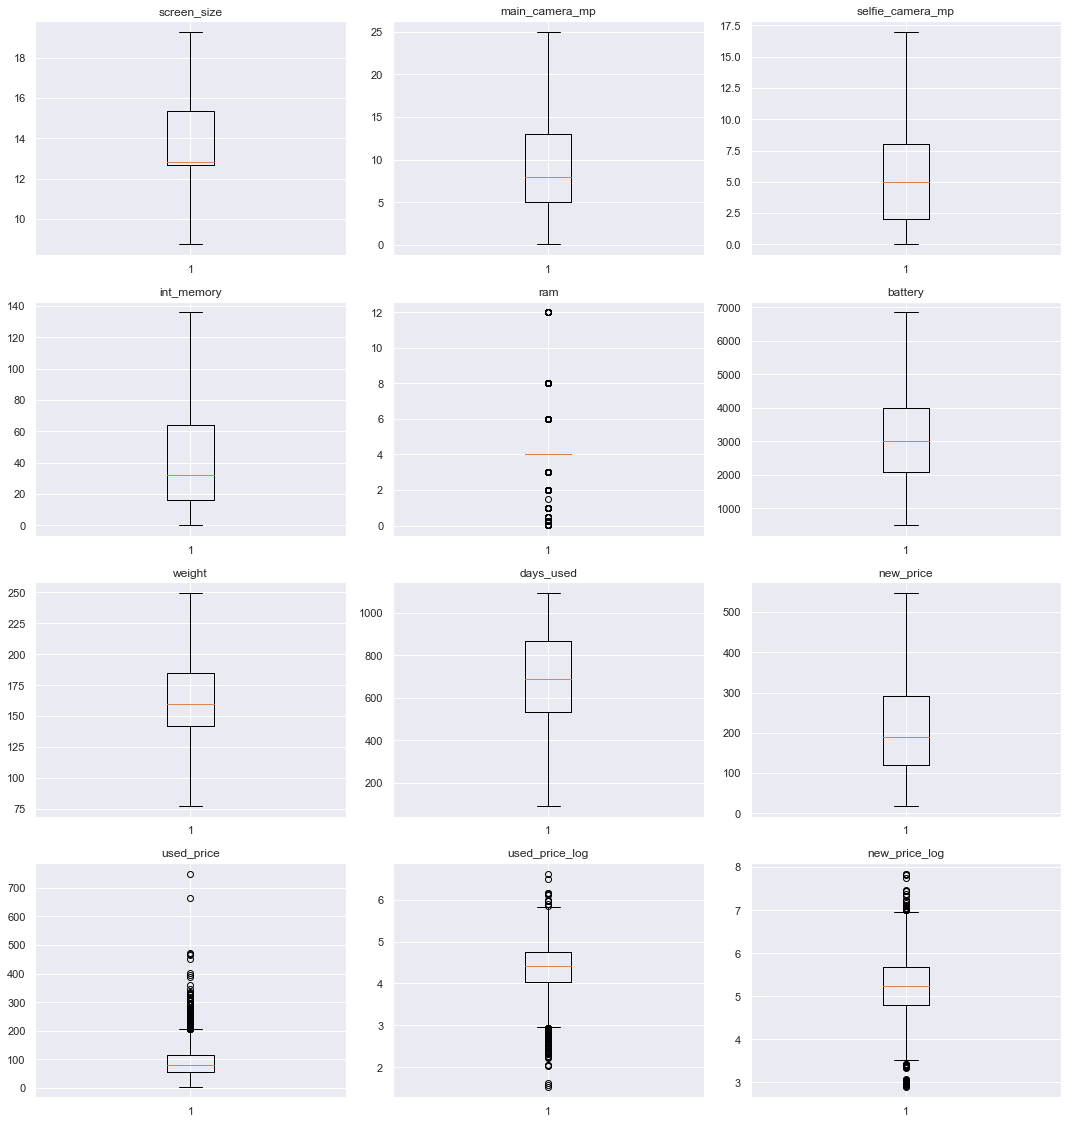

In [66]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(cols_list):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict the used device price, so we will use the normalized version `used_price_log` for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   category
 1   os                3454 non-null   category
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   category
 4   5g                3454 non-null   category
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  used_price_log    3454 non-null   float64 
 16  new_price_log     3454 n

In [68]:
# defining the dependent and independent variables
X = df1.drop(
    ["new_price", "used_price", "used_price_log", "device_category"], axis=1
)  # To drop "new_price", "used_price", "used_price_log", "device_category" from the data
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   6850.0   249.5          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

In [69]:
X = sm.add_constant(X)

In [70]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  # Function to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [71]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)  

In [72]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [73]:
x_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,2014,819,...,0,0,1,0,0,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,2016,585,...,0,0,0,0,0,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,2015,727,...,0,0,0,0,0,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,2015,800,...,0,0,1,0,0,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,2017,560,...,0,0,0,0,0,0,0,0,1,0


In [74]:
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [75]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)  # To add contant to the test data

olsmodel1 = sm.OLS(y_train, x_train).fit()  # To fit OLS model
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     265.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:14:14   Log-Likelihood:                 110.91
No. Observations:                2417   AIC:                            -123.8
Df Residuals:                    2368   BIC:                             159.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -14.76

## Interpreting the Regression Results:
- Adjusted. R-squared: It reflects the fit of the model.
- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for adj. R-squared is 0.840, which is good!
- const coefficient: It is the Y-intercept.
- It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
- In our case, the value for const coefficient is -14.7684
- Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
- In our case, the coefficient of main camera is 0.0216.

**Let's check the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [76]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(
    olsmodel1, x_train, y_train
) 
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,24.859416,16.464833,18.823896


In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)  
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,24.89413,17.067293,19.793622


RMSE values on the train and test sets are quite close and comparable, This shows that the model is not overfitting.

MAE indicates that our current model is able to predict devices used prices within a mean error of 17.067 on the test set.

MAPE of 19.79 on the test data means that we are able to predict within approx 20% of the devices used price.

**Observations**


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.



In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [80]:
checking_vif(x_train)  # Check VIF on train data


,feature,VIF
0,const,4.200947e+06
1,screen_size,5.360628e+00
2,main_camera_mp,2.499470e+00
3,selfie_camera_mp,3.931958e+00
4,int_memory,2.495873e+00
5,ram,2.222289e+00
6,battery,3.717815e+00
7,weight,4.612502e+00
8,release_year,5.424591e+00
9,days_used,2.660591e+00


Screen_size, release_year, brand_name_Huawei, brand_name_others and brand_name_samsung have VIFs greater than 5 but less than 10.

brand_name_Apple and os_iOS have VIFs slightly greater than 10

## Treating multicollinearity

In [81]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [82]:
col_list = [
    "screen_size",
    "release_year",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.840104,0.233449
1,brand_name_Samsung,0.840103,0.233450
2,brand_name_Others,0.840102,0.233450
3,release_year,0.839929,0.233576
4,os_iOS,0.839814,0.233660
5,brand_name_Apple,0.839782,0.233684
6,screen_size,0.833243,0.238405


Dropping screen_size would have the maximum impact on the predictive power of the model (amongst the variables being considered).
We'll drop brand_name_Huawei and check the VIF again.

In [83]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,4.200918e+06
1,screen_size,5.356848e+00
2,main_camera_mp,2.498278e+00
3,selfie_camera_mp,3.928871e+00
4,int_memory,2.491523e+00
5,ram,2.222187e+00
6,battery,3.717513e+00
7,weight,4.611655e+00
8,release_year,5.424371e+00
9,days_used,2.659825e+00


Dropping brand_name_Huawei has brought the VIF of brand_name_Others and brand_name_Samsung below 5.

Screen_size and release_year still have a VIF score of greater than 5, while brand_name_Apple and os_iOS still have VIFs slightly greater than 10

In [84]:
col_list = [
    "screen_size",
    "release_year",
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.839996,0.233528
1,os_iOS,0.839880,0.233612
2,brand_name_Apple,0.839813,0.233661
3,screen_size,0.833302,0.238362


We'll drop release year next

In [85]:
col_to_drop = "release_year"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,166.332867
1,screen_size,5.286506
2,main_camera_mp,2.479717
3,selfie_camera_mp,3.393052
4,int_memory,2.394523
5,ram,2.219184
6,battery,3.653494
7,weight,4.602333
8,days_used,1.982853
9,new_price_log,3.057223


Dropping release_year...
Screen_size still have a VIF score greater than 5, while brand_name_Apple and os_iOS still have VIFs slightly greater than 10

In [86]:
col_list = [
    "screen_size",
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.839750,0.233707
1,brand_name_Apple,0.839662,0.233771
2,screen_size,0.832848,0.238687


We will drop os_iOS	next

In [87]:
col_to_drop = "os_iOS"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,165.630105
1,screen_size,5.282124
2,main_camera_mp,2.474939
3,selfie_camera_mp,3.380209
4,int_memory,2.393889
5,ram,2.204887
6,battery,3.643632
7,weight,4.600544
8,days_used,1.979280
9,new_price_log,3.056750


Dropping os_iOS has brought the VIF of brand_name_Apple below 5.
screen_size	still have a VIF score of slightly greater than 5.

In [88]:
checking_vif(x_train)

,feature,VIF
0,const,4.200947e+06
1,screen_size,5.360628e+00
2,main_camera_mp,2.499470e+00
3,selfie_camera_mp,3.931958e+00
4,int_memory,2.495873e+00
5,ram,2.222289e+00
6,battery,3.717815e+00
7,weight,4.612502e+00
8,release_year,5.424591e+00
9,days_used,2.660591e+00


In [89]:
col_to_drop = "screen_size"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,149.624599
1,main_camera_mp,2.474872
2,selfie_camera_mp,3.341555
3,int_memory,2.393043
4,ram,2.201832
5,battery,3.242252
6,weight,2.779386
7,days_used,1.943026
8,new_price_log,3.052717
9,brand_name_Alcatel,1.444098


The above predictors have no multicollinearity and the assumption is satisfied.
Let's check the model summary.

In [90]:
olsmod2 = sm.OLS(y_train, x_train5).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     273.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:14:15   Log-Likelihood:                 53.318
No. Observations:                2417   AIC:                            -16.64
Df Residuals:                    2372   BIC:                             243.9
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.13

## Interpreting the Regression Results:
1. Adjusted. R-squared: It reflects the fit of the model.
Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for adj. R-squared is 0.833, which is good!
2. const coefficient: It is the Y-intercept.
It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
In our case, the value for const coefficient is 1.1397 
3. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
In our case, the coefficient of main_camera is 0.0219.
4. std err: It reflects the level of accuracy of the coefficients.
The lower it is, the higher is the level of accuracy.
5. P>|t|: It is p-value.

For each independent feature, there is a null hypothesis and an alternate hypothesis. Here  𝛽𝑖  is the coefficient of the  𝑖 th independent variable.

𝐻𝑜  : Independent feature is not significant ( 𝛽𝑖=0 )
𝐻𝑎  : Independent feature is that it is significant ( 𝛽𝑖≠0 )
(P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.

A p-value of less than 0.05 is considered to be statistically significant.

6. Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Observations

- We can see that adj. R-squared has dropped from 0.840 to 0.833, which shows that the dropped columns did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [91]:
# initial list of columns
cols = x_train5.columns.tolist()   # Check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train5[cols]   # Check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)



['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'new_price_log', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'os_Others', '4g_yes', '5g_yes']


In [92]:
x_train6 = x_train5[["const"] + selected_features]
x_test6 = x_test5[["const"] + selected_features]

In [93]:
olsmodel3 = sm.OLS(y_train, x_train6).fit() # Fit OLS() on y_train and x_train2
print(olsmodel3.summary())


                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     857.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:14:15   Log-Likelihood:                 36.416
No. Observations:                2417   AIC:                            -42.83
Df Residuals:                    2402   BIC:                             44.02
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5643      0

Now no feature (other than the constant) has p-value greater than 0.05, so we'll consider the features in x_train6 as the final set of predictor variables and olsmod3 as final model.

## Observations

- Now adjusted R-squared is 0.832, i.e., our model is able to explain ~83% of the variance. This shows that the model is good.
- The adjusted R-squared in olsmod1 (where we considered all the variables) was 0.840. This shows that the variables we dropped were not affecting the model much

In [94]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, x_train6, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,MAPE
0,26.030829,17.014092,19.480195


In [95]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(olsmodel3, x_test6, y_test) 
olsmodel3_test_perf


Test Performance



,RMSE,MAE,MAPE
0,25.590285,17.45428,20.422179


- The model is able to explain ~84% of the variation in the data, which is very good.

- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

- The MAPE on the test set suggests we can predict within 20.4% of the devices used price.

- Hence, we can conclude the model olsmod3 is good for prediction as well as inference purposes.

**Now we'll check the rest of the assumptions on *olsmod3*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.


In [96]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train # To store the actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
3026,4.087488,3.805336,0.282152
1525,4.448399,4.778152,-0.329752
1128,4.315353,4.315168,0.000185
3003,4.282068,4.165571,0.116498
2907,4.456438,4.520087,-0.063648


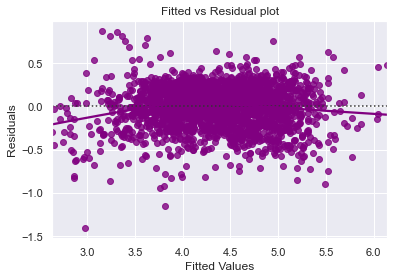

In [97]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()


- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

- We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.


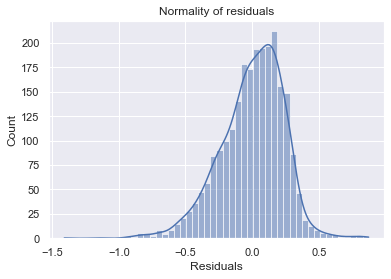

In [98]:
sns.histplot(data=df_pred, x="Residuals", kde=True) # To test the normality
plt.title("Normality of residuals")
plt.show()


- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

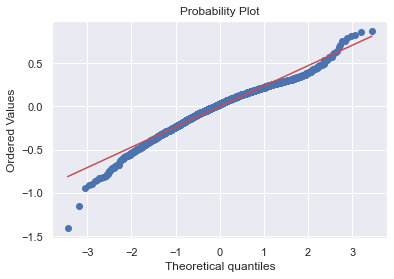

In [99]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) # Check Q-Q plot
plt.show()


- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [100]:
stats.shapiro(df_pred["Residuals"]) # To check p-value


ShapiroResult(statistic=0.9746544361114502, pvalue=2.6725669216659872e-20)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
Strictly speaking, the residuals are not normal.
However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.


In [101]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train6) # To check homoscedasticity
lzip(name, test)



[('F statistic', 1.048622034158293), ('p-value', 0.20613790288679354)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary

In [102]:
olsmodel_final = sm.OLS(y_train, x_train6).fit() # To fit the final model
print(olsmodel_final.summary())


                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     857.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:14:16   Log-Likelihood:                 36.416
No. Observations:                2417   AIC:                            -42.83
Df Residuals:                    2402   BIC:                             44.02
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5643      0

In [103]:
# Let's convert coefficients to odds
odds = np.exp(olsmodel_final.params)

# finding the percentage change
perc_change_odds = (np.exp(olsmodel_final.params) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame(
    {"Odds": odds, "Change_odds%": perc_change_odds}, index=x_train6.columns
).T

,const,const,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,new_price_log,brand_name_Karbonn,brand_name_Lenovo,brand_name_Nokia,brand_name_Sony,os_Others,4g_yes,5g_yes
Odds,1.758133,1.758133,1.022054,1.019700,1.000547,1.023302,1.000033,1.003267,1.500001,1.124359,1.045259,1.135968,0.933846,0.903064,1.044345,0.936508
Change_odds%,75.813319,75.813319,2.205375,1.969983,0.054715,2.330232,0.003302,0.326735,50.000137,12.435907,4.525914,13.596765,-6.615450,-9.693591,4.434498,-6.349245


In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train6, y_train) # To check the performance on train data
olsmodel_final_train_perf


Training Performance



,RMSE,MAE,MAPE
0,26.030829,17.014092,19.480195


In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test6, y_test ) 
olsmodel_final_test_perf


Test Performance



,RMSE,MAE,MAPE
0,25.590285,17.45428,20.422179


The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

The MAPE on the test set suggests we can predict within 20.4% of the used/refurbished devices.

MAE suggests that the model can predict used/refurbished devices within a mean error of 17.45 Euros on the test data

Hence, we can conclude the model olsmod3 is good for prediction as well as inference purposes.

##  Actionable Insights and Recommendations



Majority of the factors listed in the model have a positive influence on price of used/refurbished devices i.e as these attributes increase, the Price of the used/refurbished device (in euros) also increases: 

- 1 unit increase in  Resolution of the rear camera in megapixels (main_camera_mp) leads to a 0.0218 increase price of a used/refurbished device in euros.

- 1 unit increase in price of a new device of the same model in euros will lead  to a 0.4055 increase price of a used/refurbished device in euros. 

- 1 unit increase in the amount of ram, which is important in the smooth running of a device, will lead  to a 0.0230 increase price of a used/refurbished device in euros. 

- 1 unit increase each, in the energy capacity of the device battery in mAh and weight of the device in grams, will lead  to a 3.302e-05 and 0.0033 increase price of a used/refurbished device in euros respectively. People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands.

- Brand_name_Sony tends to have ~-0.07 Euros less used price compared to brand names of other devices.

- Devices with 4G availability tend to have ~-0.04 Euros more used price compared to devices that do not have 4G available.

- Devices with 5G availability tend to have ~-0.07 Euros less used price compared to devices that do not have 5G available.
